In [0]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -q household_power_consumption.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline

In [4]:
df = pd.read_csv('household_power_consumption.txt',sep=';')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df['TimeStamp'] = df['Date']+' '+df['Time']
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'],format = "%d/%m/%Y %H:%M:%S")
df.index = df['TimeStamp']
df.index.name = None
df = df.drop(['Date','Time','TimeStamp'],axis = 1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df = df.convert_objects(convert_numeric=True)
df = df.ffill()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
newdf = df[['Global_active_power']]
newdf.head()

,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [8]:
newdf.describe()

,Global_active_power
count,2.075259e+06
mean,1.086168e+00
std,1.053172e+00
min,7.600000e-02
25%,3.080000e-01
50%,5.980000e-01
75%,1.524000e+00
max,1.112200e+01


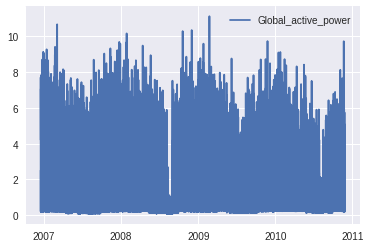

In [9]:
newdf.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c8f7e510>]],
      dtype=object)

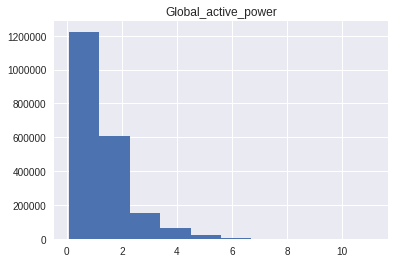

In [10]:
newdf.hist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


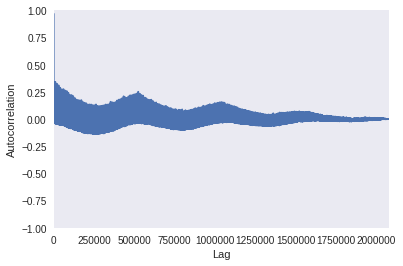

In [11]:
autocorrelation_plot(newdf)